## Regression and Classification

<b>회귀(Regression)</b>와 <b>분류(Classification)</b>의 차이점은?<p>
회귀는 어떤 파라미터 사이의 관계식을 도출하는 것이 목적이지만, 분류는 단지 서로 다른 종류의 데이터들을 구분짓거나 묶는 것이 목적이다.

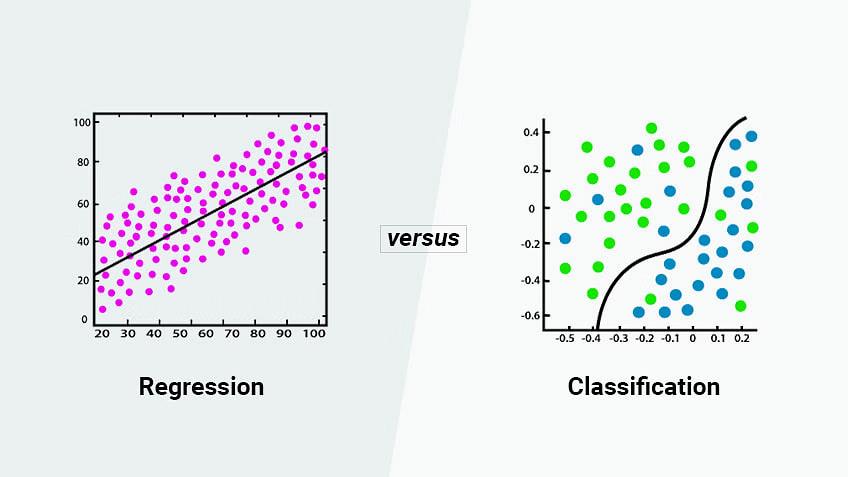

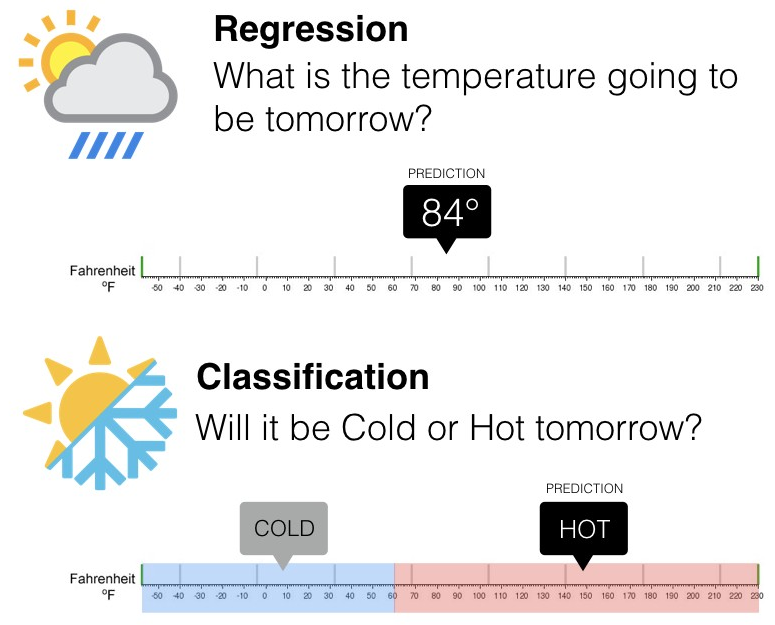

## 일차함수 관계식 찾기

x 변수, y 변수 데이터 만들기 (리스트 객체)

In [1]:
x = [-3,  31,  -11,  4,  0,  22, -2, -5, -25, -14]
y = [ -2,   32,   -10,   5,  1,   23,  -1,  -4, -24,  -13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


그래프 그리기 (matplotlib)

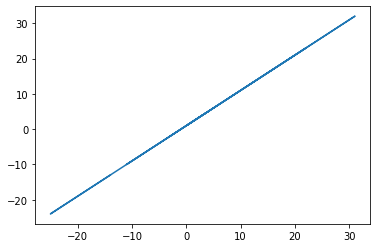

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

#### 판다스 데이터프레임 만들기

In [3]:
import pandas as pd
df = pd.DataFrame({'X':x, 'Y':y})
df.shape

(10, 2)

#### 머신러닝 - 사이킷런 *Linear Regression* 모형

In [5]:
train_features = ['X']
target_cols = ['Y']
X_train = df.loc[:, train_features]
y_train = df.loc[:, target_cols]
print(X_train.shape, y_train.shape)

(10, 1) (10, 1)


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

y=ax+b에서 기울기(a)를 coefficient, 절편(b)을 intercept라고 한다.

In [7]:
lr.coef_, lr.intercept_

(array([[1.]]), array([1.]))

y = x + 1

In [8]:
print ("기울기: ", lr.coef_[0][0])
print ("y절편: ", lr.intercept_[0])

기울기:  0.9999999999999999
y절편:  0.9999999999999999


In [10]:
import numpy as np
X_new = np.array(101).reshape(1, 1)
lr.predict(X_new)

/home/user/anaconda3/envs/nlp_qna/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[102.]])

In [11]:
X_test = np.arange(11, 16, 1).reshape(-1, 1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [12]:
y_pred = lr.predict(X_test)
y_pred

/home/user/anaconda3/envs/nlp_qna/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

2차식, 3차식, 다항식, 삼각함수, 혹은... 독특한 모양...
Keras Regression

글자(텍스트) -> 숫자: 임베딩<br>
단어 하나하나 -> word embedding<br>
나는 배를 타고 싶다. -> sentence embedding<br>
나는 배를 깎아 먹고 싶다.......... -> document embedding

## 붓꽃 데이터를 활용한 머신러닝 익히기

In [13]:
# 라이브러리 환경
import pandas as pd
import numpy as np

# skleran 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
# 설명이 보고 싶다면 아래의 코드를 실행한다.
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris['target'].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용: \n", iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)
# data 속성의 데이터셋 내용 (첫 7개 행을 추출)
print("데이터셋 내용: \n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


#### Sepal: 꽃밫침, Petal: 꽃잎

In [17]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [20]:
# 열(column) 이름을 간결하게 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기: ', df.shape)
df.head()

데이터셋의 크기:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
# 결측값 확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [21]:
# 중복 데이터 확인
df.duplicated().sum()

1

In [22]:
# 중복 데이터 제거
df = df.drop_duplicates()

In [23]:
# 변수 간의 상관관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


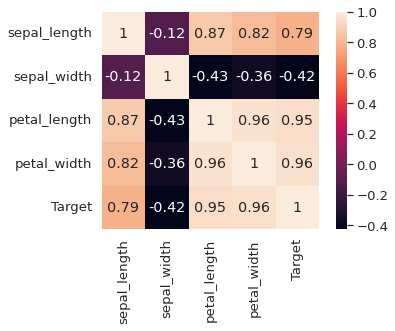

In [24]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# 상관계수 히트맵
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [25]:
# Target 값의 분포 - value_counts 함수
df['Target'].value_counts()

0    50
1    50
2    49
Name: Target, dtype: int64

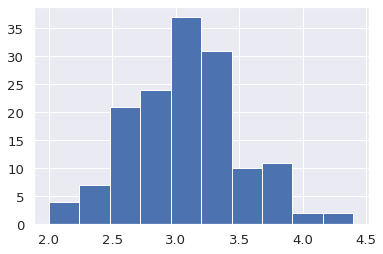

In [28]:
# sepal_length 값의 분포 - hist 함수
plt.hist(x='sepal_width', data=df)
plt.show()

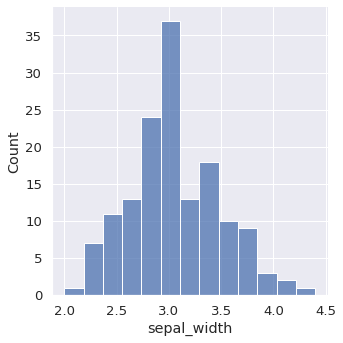

In [29]:
# sepal_widgth 값의 분포 - displot 함수 (histogram)
sns.displot(x='sepal_width', kind='hist', data=df)
plt.show()

KDE: 커널 밀도 추정<p>
커널 함수: 좌우 대칭이면서 적분값이 1이 되는 함수

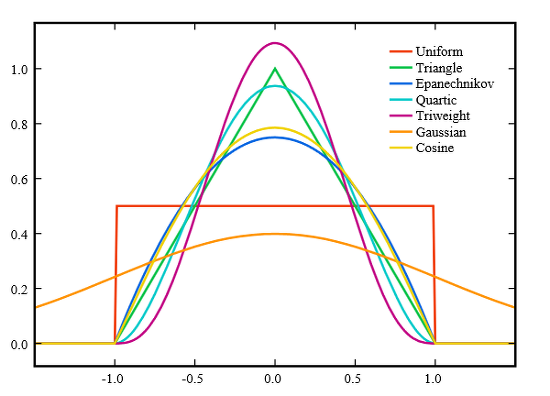

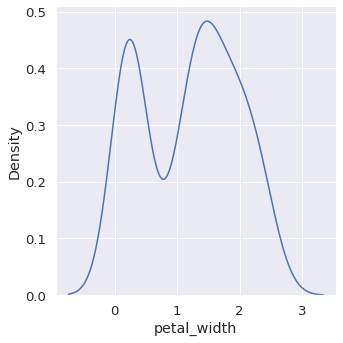

In [30]:
# petal_length 값의 분포 - displot 함수 (kde 밀도 함수 그래프)
sns.displot(x='petal_width', kind='kde', data=df)
plt.show()

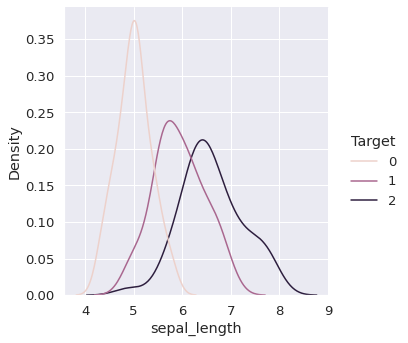

In [31]:
# 품종별 sepal_length 값의 분포 비교
sns.displot( x='sepal_length', hue='Target', kind='kde', data=df)
plt.show()

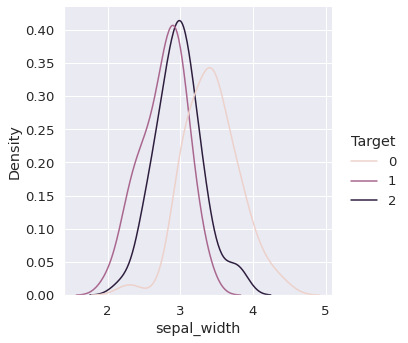

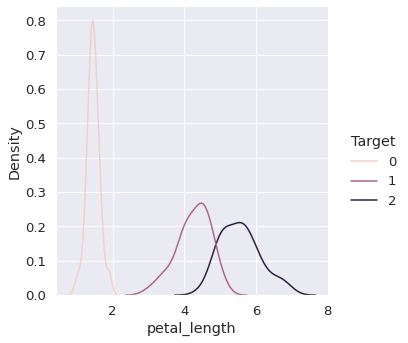

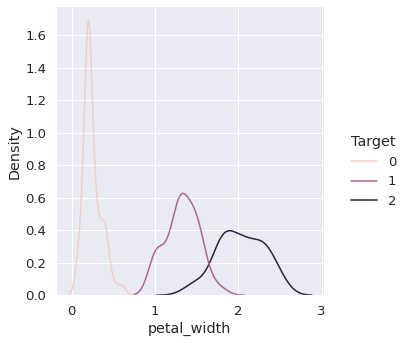

In [32]:
# 나머지 3개 피처 데이터를 한번에 그래프로 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', kind='kde', data=df)
plt.show()

In [34]:
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


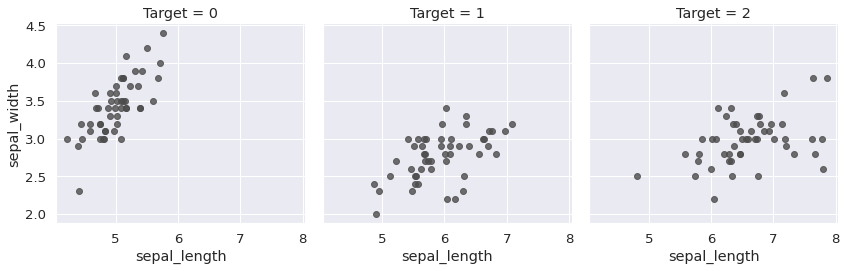

In [33]:
g = sns.FacetGrid(df, col='Target', margin_titles=True, height=4)
g.map(sns.regplot, 'sepal_length', 'sepal_width', color=".3", fit_reg=False, x_jitter=.1)

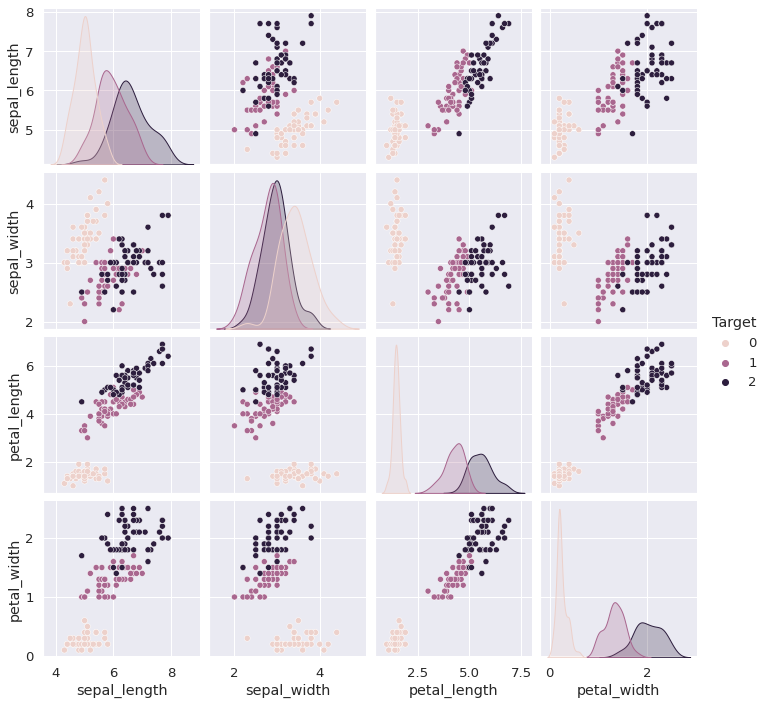

In [34]:
# 두 변수 간의 관계
sns.pairplot(df, hue = 'Target', height = 2.5, diag_kind = 'kde')
plt.show()

np.array